# Sprawozdanie z laboratorium fizycznego

## Ćwiczenie nr M9

### Cel ćwiczenia

Celem ćwiczenia jest wyznaczanie momentu bezwładności układu mas o różnym rozłożeniu względem osi obrotu.

### Opis badanego zjawiska

Moment bezwładności to właściwość fizyczna ciała, opisująca jego bezwładność w zmianie ruchu obrotowego wokół danej osi.  
Jest to miara rozłożenia masy względem osi obrotu - im większy moment bezwładności, tym trudniej zmienić prędkość kątową ciała.  
Moment bezwładności zależy od kształtu, rozkładu masy oraz odległości elementów od osi obrotu, co sprawia, że może być różny dla różnych ciał.

### Wzory i zależności

`I = ((m * g) / (8 * π^2)) * ((h1 * h2) / hsr) * (t^2 / n^2)`  
`hsr = (h1 + h2) / 2`

### Schemat układu pomiarowego

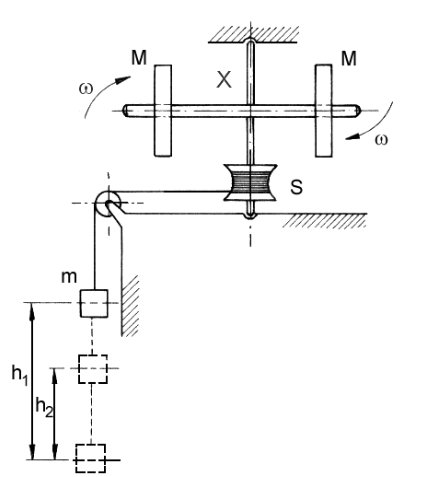

In [30]:
# Zaimportowanie potrzebnych modułów
import math

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Zdefiniowanie stałych fizycznych
M = 0.5
G = 9.81
PI = 3.14

# Zdefiniowanie stałych wyswietlania wykresów
BOTTOM_LIMIT = 0
TOP_LIMIT = 120

# Ścieżka do katalogu z danymi
DATA_PATH = 'data'


# Funcja obliczająca potrzebne dane i zwracająca ramkę DataFrame
def create_data_frame(file_name: str) -> pd.DataFrame:
    
    # Załadowanie danych z pliku csv
    csv_data = pd.read_csv(f'{DATA_PATH}/{file_name}', sep=';')
    csv_df = pd.DataFrame(csv_data)

    # Stworzenie nowej ramki z danymi
    df = csv_data[['h1', 'h2', 't']].copy()
    df['hm'] = (df['h1'] + df['h2']) / 2
    df['n'] = csv_data['2n'] / 2
    
    # Obliczenie wartości momentu bezwładności
    df['I'] = ((M * G) / (8 * PI ** 2)) * ((df['h1'] * df['h2']) / df['hm']) * ((df['t'] ** 2) / (df['n'] ** 2))

    return df


# Funkcja wyświetlająca wykres o zadanym tytule z zadanej ramki
def plot_from_df(title: str, df: pd.DataFrame) -> None:

    # Wybranie potrzebnej kolumny
    df['I'].plot()

    # Ustawienie parametrów wykresu
    plt.ylim(BOTTOM_LIMIT, TOP_LIMIT)
    plt.xlabel('numer próby')
    plt.ylabel('moment bezwładności [kg⋅m^2]')
    plt.title(title)
    
    # Wyświetl wykres
    plt.show()


## Opracowanie wyników do zadania nr M9.1

W pierwszym badaniu mierzymy moment bezwładności samej nieobciążnonej rury

,h1,h2,t,hm,n,I
0,52.5,85.0,8.19,68.75,5.50,8.950302
1,52.5,84.0,8.31,68.25,5.75,8.392513
2,52.5,84.9,8.40,68.70,5.50,9.410944
3,52.5,84.2,7.97,68.35,5.75,7.726869
4,52.5,85.5,7.84,69.00,5.50,8.220019
5,52.5,84.5,8.25,68.50,5.50,9.061450
6,52.5,85.7,8.03,69.10,5.50,8.630928
7,52.5,84.6,8.34,68.55,5.50,9.264429
8,52.5,85.5,8.06,69.00,5.25,9.534931
9,52.5,85.3,8.12,68.90,5.50,8.809789


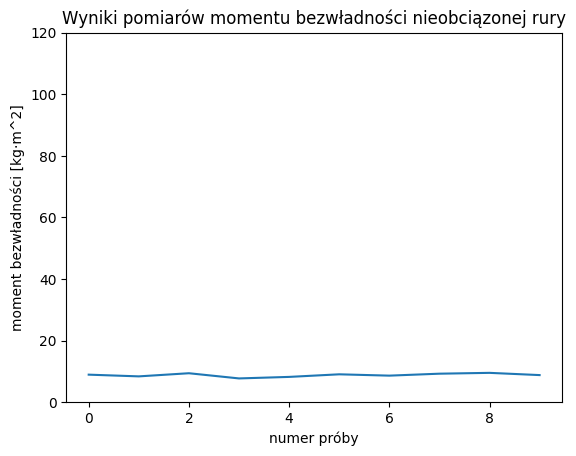

Średnia wartość momentu bezwładności nieobciążonej rury wynosi 8.880045539810785 kg*m^2


In [31]:
# Stowrzenie obiektu DataFrame z pliku data1.csv
df: pd.DataFrame = create_data_frame('data1.csv')

# Wyświetlenie wyników obliczeń
display(df)

# Wyświetlenie wykresu
plot_from_df('Wyniki pomiarów momentu bezwładności nieobciązonej rury', df)

# Obliczenie średniej wartości I
I_R0 = df['I'].median()

# Wyświetlenie wartości I0
print(f"Średnia wartość momentu bezwładności nieobciążonej rury wynosi {I_R0} kg*m^2")


## Opracowanie wyników do zadania nr M9.2

W drugim badaniu mierzymy moment bezwładności dwóch ciężarków w dwóch różnych odległościach R/2 i R

### Odległość R/2

,h1,h2,t,hm,n,I
0,52.5,81.3,15.62,66.90,5.25,35.120194
1,52.5,80.8,15.56,66.65,5.00,38.330053
2,52.5,80.9,15.50,66.70,5.00,38.053544
3,52.5,80.8,15.50,66.65,5.00,38.035018
4,52.5,81.4,15.46,66.95,5.50,31.362918
5,52.5,81.1,15.47,66.80,5.25,34.415608
6,52.5,80.9,15.69,66.70,5.50,32.224948
7,52.5,80.9,15.66,66.70,5.50,32.101835
8,52.5,80.7,15.91,66.60,5.50,33.102692
9,52.5,79.7,15.62,66.10,5.50,31.749916


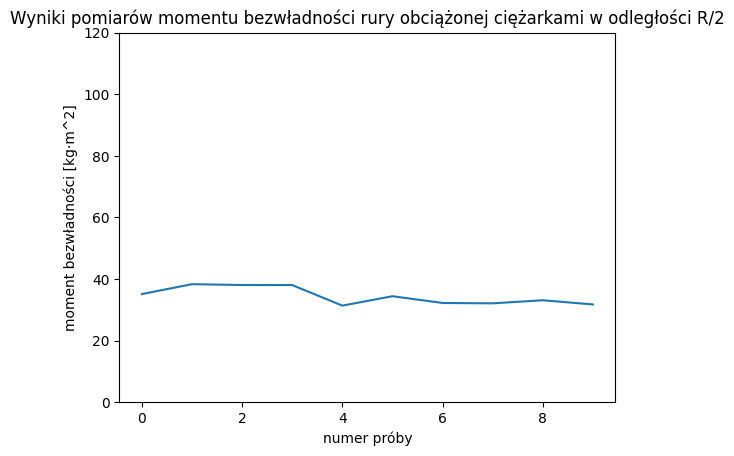

Średnia wartość momentu bezwładności rury obciążonej w R/2 wynosi 33.7591500944 kg*m^2


In [32]:
# Stowrzenie obiektu DataFrame z pliku data2.csv
df: pd.DataFrame = create_data_frame('data2.csv')

# Wyświetlenie wyników obliczeń
display(df)

# Wyświetlenie wykresu
plot_from_df('Wyniki pomiarów momentu bezwładności rury obciążonej ciężarkami w odległości R/2', df)

# Obliczenie średniej wartości I
I_R1 = df['I'].median()

# Wyświetlenie wartości I_R1
print(f"Średnia wartość momentu bezwładności rury obciążonej w R/2 wynosi {I_R1} kg*m^2")


### Odległość R

,h1,h2,t,hm,n,I
0,52.5,79.1,26.16,65.80,5.25,97.444312
1,52.5,80.0,26.04,66.25,5.50,88.370989
2,52.5,79.6,25.22,66.05,5.50,82.728293
3,52.5,79.5,26.16,66.00,5.50,88.965644
4,52.5,78.6,25.72,65.55,5.25,93.955499
5,52.5,78.5,26.66,65.50,5.50,91.933184
6,52.5,77.3,26.53,64.90,5.25,99.297822
7,52.5,76.9,26.59,64.70,5.50,90.694800
8,52.5,72.9,28.53,62.70,5.25,112.096991
9,52.5,74.3,28.09,63.40,5.50,99.799114


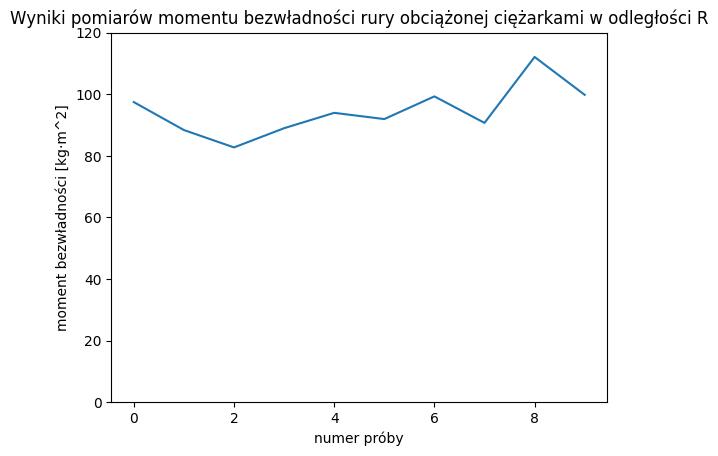

Średnia wartość momentu bezwładności rury obciążonej w R wynosi 92.94434134032386 kg*m^2


In [33]:
# Stowrzenie obiektu DataFrame z pliku data3.csv
df: pd.DataFrame = create_data_frame('data3.csv')

# Wyświetlenie wyników obliczeń
display(df)

# Wyświetlenie wykresu
plot_from_df('Wyniki pomiarów momentu bezwładności rury obciążonej ciężarkami w odległości R', df)

# Obliczenie średniej wartości I
I_R2 = df['I'].median()

# Wyświetlenie wartości I2
print(f"Średnia wartość momentu bezwładności rury obciążonej w R wynosi {I_R2} kg*m^2")


## Obliczenie momentu bezwładności ciężarków

Mając wartości momentu bezwładności w poszczególnych przypadkach, możemy wyznaczyć wartość momentu bezwładności ciężarków

In [34]:
I_M1 = I_R1 - I_R0
I_M2 = I_R2 - I_R0

print(f"Wartość momentu bezwładności dla R/2: {I_M1} kg*m^2")
print(f"Wartość momentu bezwładności dla R: {I_M2} kg*m^2")


Wartość momentu bezwładności dla R/2: 24.87910455458921 kg*m^2
Wartość momentu bezwładności dla R: 84.06429580051308 kg*m^2


## Obliczenie niepewności pomiarowej do zadania M9.3

- Wiemy, że względna niepewność w wyznaczeniu masy wynosi: 0.005 kg  
- Wiemy, że względna niepewność w wyznaczaniu czasu wynosi: 0.01 s  
- Wiemy, że względna niepewność w wyznaczaniu obrotu wynosi: 0.25 obrotu  
- Wiemy, że względna niepewność w wyznaczaniu wysokości wynosi: 0.01 m  

In [35]:
# Utworzenie stałych
N_M = 0.005
N_T = 0.01
N_O = 0.25
N_H = 0.01


# Funkcja licząca niepewność pomiarową dla wzoru podanego na początku
def calculate_measurement_uncertainty(*, mass: int, time: int, rotations: int, height: int) -> int:

    # Oblicz niepewność t^2/n^2
    N_TO = math.sqrt((N_T / time) ** 2 + (N_O / rotations) ** 2)

    # Oblicz niepewnosć m * h
    N_MH = math.sqrt((N_M / mass) ** 2 + (N_H / height) ** 2)

    # Oblicz niepewność końcową
    return math.sqrt(N_TO ** 2 + N_MH ** 2)
    

### Dla I0

In [36]:
# Pomiary dla I0
m0 = 0.5
t0 = 8.19
n0 = 5.5
h0 = 52.5

# Obliczanie niepewnosci
uncertainty_I_R0: int = calculate_measurement_uncertainty(mass=m0, time=t0, rotations=n0, height=h0)

# Wyświetl obliczoną niepewność
print(f"Wartość niepewności pomiarowej dla I0 wynosi: {uncertainty_I_R0}")


Wartość niepewności pomiarowej dla I0 wynosi: 0.046557951282677416


### Dla I_M1

In [37]:
# Pomiary dla I_M1
m1 = 0.5
t1 = 15.62	
n1 = 5.25
h1 = 52.5

# Obliczanie niepewnosci
uncertainty_I_M1: int = calculate_measurement_uncertainty(mass=m1, time=t1, rotations=n1, height=h1)

# Wyświetl obliczoną niepewność
print(f"Wartość niepewności pomiarowej dla I_M1 wynosi: {uncertainty_I_M1}")


Wartość niepewności pomiarowej dla I_M1 wynosi: 0.048662304092532915


### Dla I_M2

In [38]:
# Pomiary dla I_M2
m2 = 0.5
t2 = 26.16	
n2 = 5.25
h2 = 52.5

# Obliczanie niepewnosci
uncertainty_I_M2: int = calculate_measurement_uncertainty(mass=m2, time=t2, rotations=n2, height=h2)

# Wyświetl obliczoną niepewność
print(f"Wartość niepewności pomiarowej dla I_M2 wynosi: {uncertainty_I_M2}")

Wartość niepewności pomiarowej dla I_M2 wynosi: 0.048659594144660666


### Narysowanie wykresu z trzech pomiarów z naniesioną niepewnością pomiarową

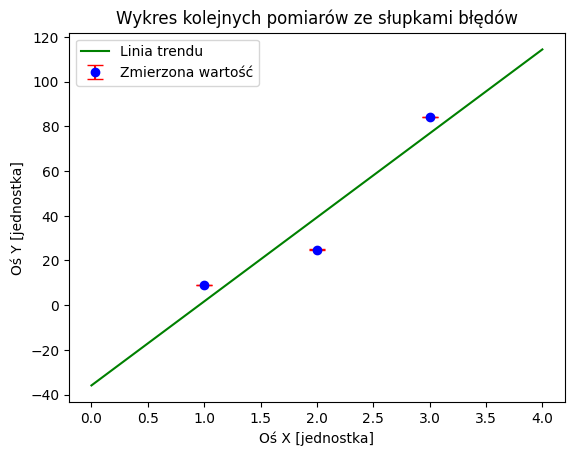

In [43]:
# Oś x - kolejne pomiary
x = [1, 2, 3]

# Oś y - wartości kolejnych momentów bezwładności
y = [I_R0, I_M1, I_M2]

# Niepewność w kolejnych pomiarach
error = [uncertainty_I_R0, uncertainty_I_M1, uncertainty_I_M2]

# Tworzenie liniowej funkcji trendu
trend_line = np.poly1d(np.polyfit(x, y, 1))

# Generowanie punktów dla linii trendu
x_trend = np.linspace(min(x)-1, max(x)+1, 100)
y_trend = trend_line(x_trend)

# Generowanie pomiarów z naniesonym błędem
plt.errorbar(x, y, yerr=error, fmt='o', color='blue', ecolor='red', capsize=6, markersize=6, label='Zmierzona wartość')

# Dodawanie linii trendu do wykresu
plt.plot(x_trend, y_trend, color='green', label='Linia trendu')

# Proszę pamiętać o tytule wykresu, etykietach osi wraz z jednostkami oraz legendzie
plt.title('Wykres kolejnych pomiarów ze słupkami błędów')
plt.xlabel('Oś X [jednostka]')
plt.ylabel('Oś Y [jednostka]')
plt.legend()

plt.show()


### Komentarz
Na wykresie widać, że drugi pomiar odstaje niewiele od dwóch pozostałych, co może być spowodowane zmianą metodologi liczenia obrotów podczas jego trwania